# **Setup**

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Data Import**

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

print(df.shape)
df.head()

(51290, 21)


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


# **Data Validation**

In [8]:
df.shape

(51290, 21)

In [11]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [3]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [13]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


In [12]:
df.loc[:,['sales','quantity','discount','profit','shipping_cost']].describe()

,sales,quantity,discount,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818
std,487.565361,2.278766,0.212280,174.424113,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


# **Data Exploration**

In [15]:
df.groupby(by='segment')['sales'].agg(['sum','min','max','count'])

,sum,min,max,count
segment,,,,
Consumer,6.507949e+06,0.444,13999.96,26518
Corporate,3.824698e+06,0.556,17499.95,15429
Home Office,2.309855e+06,0.990,22638.48,9343


# **Data Analysis**

* Q1. What is the overall sales trend? 
* Q2. Which are the Top 10 products by sales?
* Q3. Which are the Most Selling Products?
* Q4. Which is the most preferred Ship Mode?
* Q5. Which are the Most Profitable Category and Sub-Category?

## **Q1. What is the overall sales trend?**

In [17]:
print(df['order_date'].min())
print(df['order_date'].max())

2011-01-01 00:00:00
2014-12-31 00:00:00


In [85]:
df['Order_Month'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

df.loc[:,['order_date','ship_date','Order_Month']].head()

,order_date,ship_date,Order_Month
0,2011-01-01,2011-01-06,2011-01
1,2011-01-01,2011-01-08,2011-01
2,2011-01-01,2011-01-05,2011-01
3,2011-01-01,2011-01-05,2011-01
4,2011-01-01,2011-01-08,2011-01


In [86]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'Order_Month'],
      dtype='object')

In [89]:
df_monthly_sales = df.groupby('Order_Month')['sales'].sum().reset_index()
df_monthly_sales.head()

,Order_Month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Sales'>

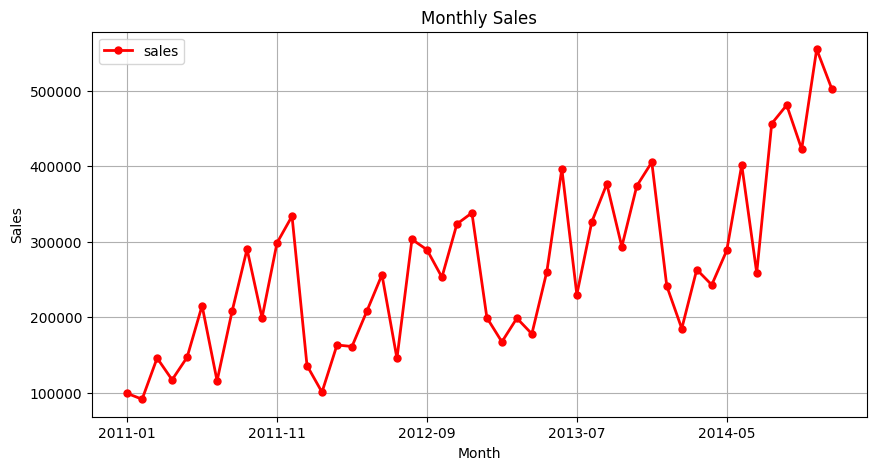

In [104]:
df_monthly_sales.plot(kind='line',x='Order_Month',y='sales',figsize=(10,5),
                      title='Monthly Sales',grid=True,legend=True,
                      xlabel='Month',ylabel='Sales',
                      color='red',marker='o',markersize=5,linewidth=2)

## **Q2. Which are the Top 10 products by sales?**

In [20]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'Order_Month'],
      dtype='object')

In [57]:
# Group By Product_id & Get Corresponding Product_Name & sales
df.groupby(['product_name']).agg({'sales':'sum','quantity':'sum'}).sort_values(by='sales', ascending=False).reset_index()[:10]

,product_name,sales,quantity
0,"Apple Smart Phone, Full Size",86935.7786,171
1,"Cisco Smart Phone, Full Size",76441.5306,139
2,"Motorola Smart Phone, Full Size",73156.3030,134
3,"Nokia Smart Phone, Full Size",71904.5555,147
4,Canon imageCLASS 2200 Advanced Copier,61599.8240,20
5,"Hon Executive Leather Armchair, Adjustable",58193.4841,169
6,"Office Star Executive Leather Armchair, Adjust...",50661.6840,141
7,"Harbour Creations Executive Leather Armchair, ...",50121.5160,142
8,"Samsung Smart Phone, Cordless",48653.4600,108
9,"Nokia Smart Phone, with Caller ID",47877.7857,96


In [56]:
# Group By Product_id & Get Corresponding Product_Name & sales
df.groupby(['product_id', 'product_name']).agg({'sales':'sum','quantity':'sum'}).sort_values(by='sales', ascending=False).reset_index()[:10]

,product_id,product_name,sales,quantity
0,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.8240,20
1,TEC-PH-10004664,"Nokia Smart Phone, with Caller ID",30041.5482,52
2,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.3840,31
3,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.4800,6
4,TEC-PH-10004823,"Nokia Smart Phone, Full Size",22262.1000,39
5,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,21870.5760,39
6,FUR-CH-10000027,"SAFCO Executive Leather Armchair, Black",21329.7300,50
7,OFF-AP-10004512,"Hoover Stove, Red",21147.0840,38
8,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,19823.4790,37
9,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,19024.5000,48


## **Q3. Which are the Most Selling Products?**

In [55]:
# Group By Product_id & Get Corresponding Product_Name & sales
df.groupby(['product_name']).agg({'sales':'sum','quantity':'sum'}).sort_values(by='quantity', ascending=False).reset_index()[:10]

,product_name,sales,quantity
0,Staples,7008.2000,876
1,"Cardinal Index Tab, Clear",1922.8302,337
2,"Eldon File Cart, Single Width",34387.7287,321
3,"Rogers File Cart, Single Width",29466.3053,262
4,"Sanford Pencil Sharpener, Water Color",5581.9741,259
5,"Stockwell Paper Clips, Assorted Sizes",2395.4378,253
6,"Avery Index Tab, Clear",1312.9488,252
7,"Ibico Index Tab, Clear",1807.1811,251
8,"Smead File Cart, Single Width",25397.1708,250
9,"Stanley Pencil Sharpener, Water Color",5537.2290,242


## **Q4. Which is the most preferred Ship Mode?**

In [58]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'Order_Month'],
      dtype='object')

<Axes: xlabel='ship_mode', ylabel='count'>

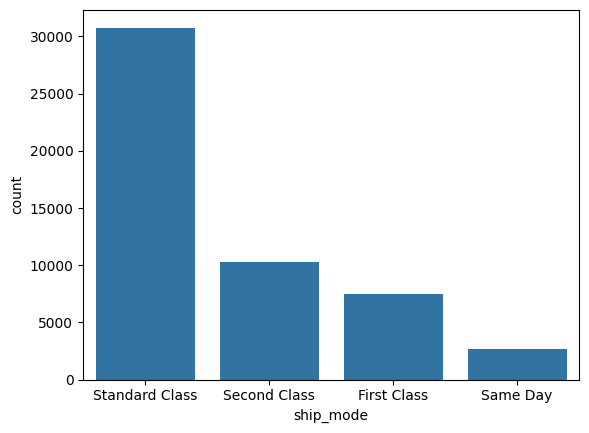

In [63]:
sns.countplot(data=df,x='ship_mode',
              order=df['ship_mode'].value_counts().index)

## **Q5. Which are the Most Profitable Category and Sub-Category?**

In [64]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'Order_Month'],
      dtype='object')

In [75]:
df.groupby(['category','sub_category']).agg({'profit':'sum'}).sort_values(by='profit',ascending=False).reset_index()

,category,sub_category,profit
0,Technology,Copiers,258567.54818
1,Technology,Phones,216717.00580
2,Furniture,Bookcases,161924.41950
3,Furniture,Chairs,141973.79750
4,Office Supplies,Appliances,141680.58940
5,Technology,Accessories,129626.30620
6,Office Supplies,Storage,108461.48980
7,Office Supplies,Binders,72449.84600
8,Office Supplies,Paper,59207.68270
9,Technology,Machines,58867.87300
